In [35]:
import typing
import numpy as np
import matplotlib.pyplot as plt 

def trapezoidal_rule(func, a, b, n=100):
    x = np.linspace(a, b, n+1)
    y = func(x)
    h = (b - a) / n
    return (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


def integrand_f(phi: typing.Callable, i):
    return lambda x: x * phi(x, i)

def build_matrix_and_vector(n, phi, phi_prime, integration_n, alpha, gamma):
    A = np.zeros((n, n))
    f = np.zeros(n)
    for i in range(1, n+1):
        for j in range(1, n+1):
            aij_integrand = lambda x: alpha*phi_prime(x, i)*phi_prime(x, j) + gamma*phi(x, i)*phi(x, j)
            A[i-1, j-1] = trapezoidal_rule(aij_integrand, 0, 1, n=integration_n)
        fi_integrand = lambda x: x*phi(x, i)
        f[i-1] = trapezoidal_rule(fi_integrand, 0, 1, n=integration_n)
    return A, f

def solve_galerkin(n, phi: typing.Callable, phi_prime: typing.Callable, integration_n, alpha, gamma):
    A, f = build_matrix_and_vector(n, phi, phi_prime, integration_n, alpha, gamma)
    w = np.linalg.solve(A, f)
    return A, f, w

def u_h(x, w, phi):
    n = len(w)
    return sum(w[i] * phi(x, i+1) for i in range(n))

def phi_xi(x, i):
    return x**i * (x - 1)

def phi_xi_prime(x, i):
    return i * x**(i-1) * (x - 1) + x**i

def u_alpha_pequeno(x):
    e = np.e
    factor = 100 * np.sqrt(10)
    numerator = -np.exp(-factor * (x - 1)) - np.exp(factor * x) + 1 + np.exp(factor)
    denominator = 1 + np.exp(factor)
    return numerator / denominator

def u_alpha_grande(x):
    e = np.e
    numerator = -np.exp(1 - x) - np.exp(x) + 1 + e
    denominator = 1 + e
    return numerator / denominator

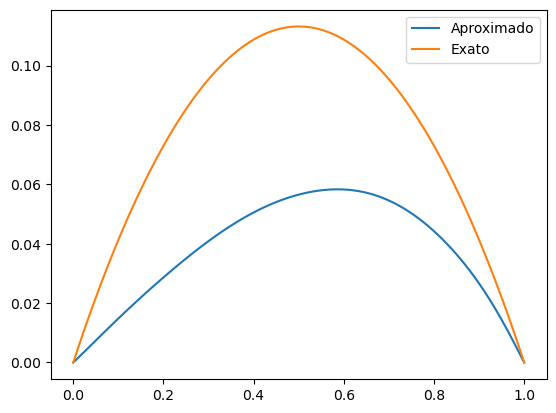

In [36]:
# Parameters
n = 10

alpha=1
gamma=1

# Solve using Galerkin metho
A, f, w = solve_galerkin(n, phi_xi, phi_xi_prime, integration_n = 100, alpha=alpha, gamma=gamma)

# Evaluate the solution u_h at some points
x_points = np.linspace(0, 1, 100)
u_h_values = [u_h(x, w, phi_xi) for x in x_points]
u_e_values = [u_alpha_grande(x) for x in x_points]

plt.plot(x_points, u_h_values, label="Aproximado")
plt.plot(x_points, u_e_values, label="Exato")
plt.legend()

plt.savefig("images/exercicio8_alpha_grande.png")

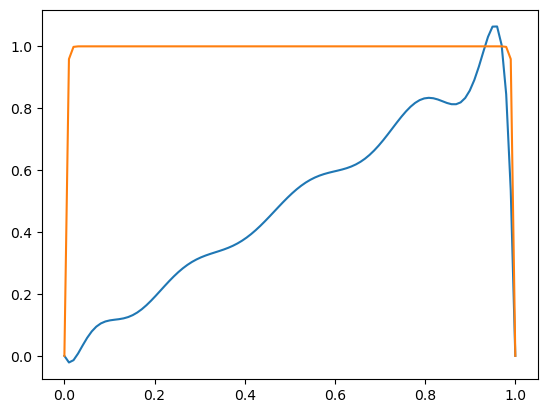

In [37]:
# Parameters
n = 10

alpha=1e-5
gamma=1

# Solve using Galerkin method
A, f, w = solve_galerkin(n, phi_xi, phi_xi_prime, integration_n = 100, alpha=alpha, gamma=gamma)

# Evaluate the solution u_h at some points
x_points = np.linspace(0, 1, 100)
u_h_values = [u_h(x, w, phi_xi) for x in x_points]
u_e_values = [u_alpha_pequeno(x) for x in x_points]

plt.plot(x_points, u_h_values, label="Aproximado")
plt.plot(x_points, u_e_values, label="Exato")

plt.savefig("images/exercicio8_alpha_pequeno.png")